# 1. Install Necessary Libraries

In [1]:
%%capture --no-stderr
%pip install -U langgraph langchain langchain_openai

# 2. Import necessary dependencies and set environment variables

In [2]:
import os
import getpass

from langchain_openai import ChatOpenAI

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")

llm = ChatOpenAI(model="gpt-4o-mini")

OPENAI_API_KEY: ··········


# Agentic System

An Agentic System, in the context of AI, refers to a system where one or more Agents are involved. These agents are not just passive entities that respond to commands but exhibit characteristics like:

Autonomy: They can act independently and make decisions.

Proactiveness: They can initiate actions and pursue goals.

Adaptability: They can learn and adapt to changes in their environment.

Goal-Oriented Behavior: They strive to achieve specific objectives or fulfill a particular purpose.

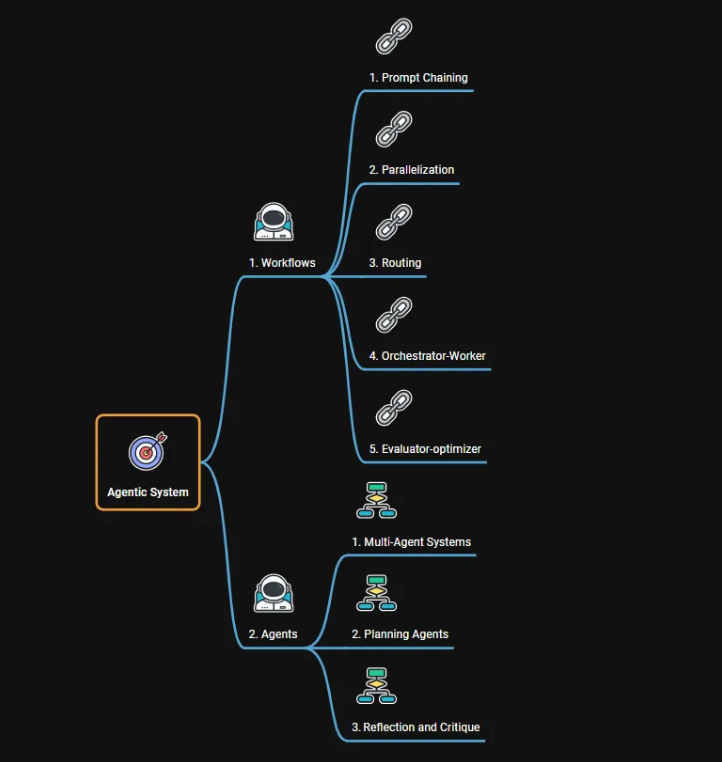

Detailed Blog : https://aiproductplaybook.substack.com/p/101-what-the-heck-are-agentic-system

# 3. Workflow - Parallelization

LLMs can sometimes work simultaneously on a task and have their outputs aggregated programmatically. This workflow, parallelization, manifests in two key variations: Sectioning: Breaking a task into independent subtasks run in parallel. Voting: Running the same task multiple times to get diverse outputs.

When to use this workflow: Parallelization is effective when the divided subtasks can be parallelized for speed, or when multiple perspectives or attempts are needed for higher confidence results. For complex tasks with multiple considerations, LLMs generally perform better when each consideration is handled by a separate LLM call, allowing focused attention on each specific aspect.

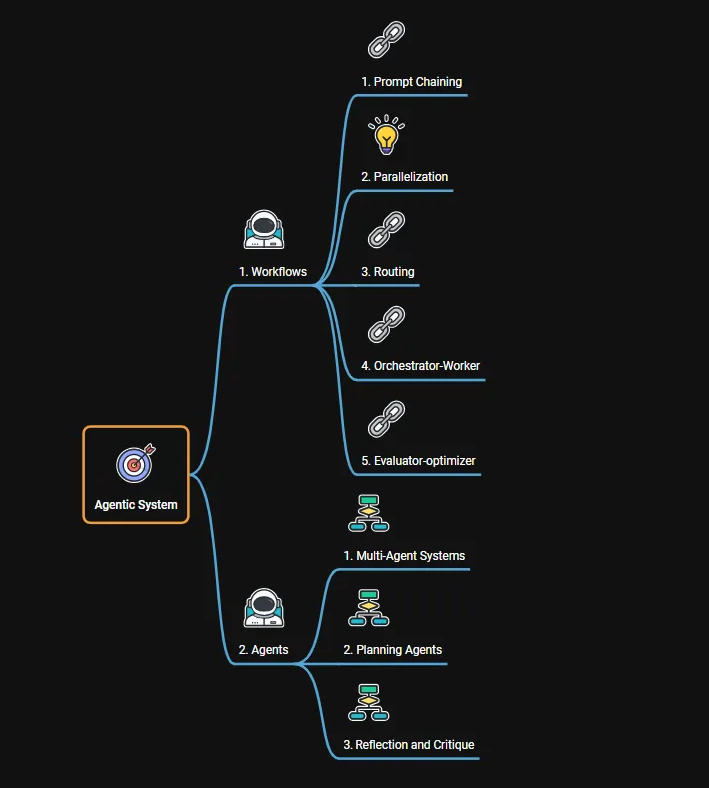

Detailed blog : https://aiproductplaybook.substack.com/p/what-the-heck-are-parallelization

### a. Import LangGraph and other dependencies

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

### b. Defining a State Class

In this case, the State dictionary will have the following keys and their corresponding data types:

1. topic: A string representing the topic of the joke.
2. joke: A string representing a joke associated with the topic
3. story : A string representing a story associated with the topic
4. poem : A string representing a poem associated with the topic
5. Combined output : aggregator

In [14]:
# Graph state
class State(TypedDict):
    topic: str
    joke: str
    story: str
    poem: str
    combined_output: str

### c. Defining Node Functions:

1. class State(TypedDict):

This line declares a class named State that inherits from the TypedDict class.
TypedDict is a special type in Python that allows you to define custom dictionary types with specific keys and their expected data types. This helps with type hinting and makes your code more readable and maintainable, especially in larger projects.

2. topic: str

This line defines a key named topic within the State dictionary.
The str after the colon indicates that the value associated with the topic key must be a string. This ensures that the topic will always hold a string value, improving code readability and potentially catching errors early on.

3. joke: str, story: str, poem: str, combined_output: str

These lines define similar key-value pairs within the State dictionary.
Each key (joke, story, poem, combined_output) represents a different type of output or result.
The str after each key indicates that the corresponding value must also be a string.

In [15]:
# Nodes
def call_llm_1(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a joke about {state['topic']}")
    return {"joke": msg.content}


def call_llm_2(state: State):
    """Second LLM call to generate story"""

    msg = llm.invoke(f"Write a story about {state['topic']}")
    return {"story": msg.content}


def call_llm_3(state: State):
    """Third LLM call to generate poem"""

    msg = llm.invoke(f"Write a poem about {state['topic']}")
    return {"poem": msg.content}


def aggregator(state: State):
    """Combine the joke and story into a single output"""

    combined = f"Here's a story, joke, and poem about {state['topic']}!\n\n"
    combined += f"STORY:\n{state['story']}\n\n"
    combined += f"JOKE:\n{state['joke']}\n\n"
    combined += f"POEM:\n{state['poem']}"
    return {"combined_output": combined}

### d. Build workflow

This code block defines a state graph that represents the workflow for generating a joke. It includes nodes for different stages of the joke generation process (generating, improving, polishing) and edges that define the flow of execution based on the results of the check_punchline function. The compile() method prepares the workflow for execution.

In [16]:
# Build workflow
parallel_builder = StateGraph(State)

# Add nodes
parallel_builder.add_node("call_llm_1", call_llm_1)
parallel_builder.add_node("call_llm_2", call_llm_2)
parallel_builder.add_node("call_llm_3", call_llm_3)
parallel_builder.add_node("aggregator", aggregator)

# Add edges to connect nodes
parallel_builder.add_edge(START, "call_llm_1")
parallel_builder.add_edge(START, "call_llm_2")
parallel_builder.add_edge(START, "call_llm_3")
parallel_builder.add_edge("call_llm_1", "aggregator")
parallel_builder.add_edge("call_llm_2", "aggregator")
parallel_builder.add_edge("call_llm_3", "aggregator")
parallel_builder.add_edge("aggregator", END)
parallel_workflow = parallel_builder.compile()

### e. Visualize the workflow graph

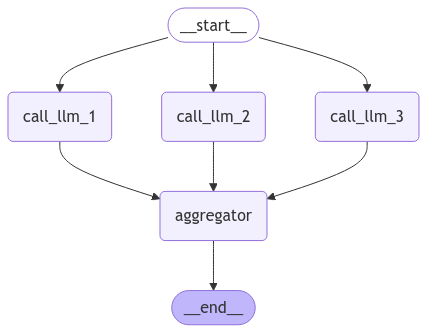

In [17]:
# Show workflow
display(Image(parallel_workflow.get_graph().draw_mermaid_png()))

### f. Invoke the Workflow - Prompt Chain

In [18]:
# Invoke
state = parallel_workflow.invoke({"topic": "nerds"})
print(state["combined_output"])

Here's a story, joke, and poem about nerds!

STORY:
### The Quest for the Lost Code

In the small town of Techville, where the scent of pizza and the sound of keyboards clicking was the anthem of life, a group of nerds gathered every Friday night in the dusty back room of their favorite comic book store, "Hero's Haven." The room was a trove of forgotten technology, old video game consoles, and stacks of comic books, all of which smelled faintly of adventure.

At the helm of the group was Cedric, a wiry fellow who could recite every line from "The Lord of the Rings" and could build a computer from scratch with his eyes shut. In his worn-out graphic T-shirt and thick glasses, he wore his nerdiness like a badge of honor. Alongside him was Elara, a quiet but fiercely intelligent coder with an affinity for role-playing games, whose bright purple hair and penchant for tattoos made her stand out in any crowd. Then there was Jasper, a master of all things trivia, who could answer any question 

In [19]:
# Invoke
state = parallel_workflow.invoke({"topic": "Generative AI"})
print(state["combined_output"])

Here's a story, joke, and poem about Generative AI!

STORY:
**Title: The Canvas of Tomorrow**

In the year 2045, the world had transformed in ways once deemed impossible. Cities sparkled with the neon hues of innovation, and at the heart of this revolution was Generative AI—an advanced technology that blended creativity with computation. It was not just a tool; it was a partner to humanity, a collaborator that breathed life into imagination.

Among the countless projects that evolved from this technology was a cultural hub known as "The Canvas." Operated by a small team of artists, scientists, and programmers, it stood at the intersection of art and science. Inside, walls were adorned with digital masterpieces, soundscapes filled the air, and scents wafted from interactive installations. Here, people came to explore the power of collective creativity, guided by an AI named Aidan.

Aidan was no ordinary generative AI. Designed to learn from human experiences and emotions, it could draw 

In [20]:
# Invoke
state = parallel_workflow.invoke({"topic": "Lionel Messi"})
print(state["combined_output"])

Here's a story, joke, and poem about Lionel Messi!

STORY:
Once upon a time in the bustling city of Rosario, Argentina, a young boy named Lionel Messi discovered his passion for soccer at an early age. With a soccer ball almost permanently glued to his feet, Messi would spend hours dribbling between the alleys and streets, dazzling his friends and neighbors with an extraordinary talent that was evident even at this tender age.

At just six years old, Messi joined the local club, Grandoli, where his small stature and remarkable agility set him apart from the other children. He quickly became the star of his team, inspiring not just his teammates but also the whole community. His family recognized his unique gift but knew that there were challenges ahead. As a child, Messi was diagnosed with growth hormone deficiency, which could hinder his development and dreams of becoming a professional athlete.

In search of a solution, Messi's family made the agonizing decision to move to Spain when